<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDGClusteringJerarquicoV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311718 sha256=5e52994c19158aed67b8d73d8a04b9263644eedd887ce6cae4c8cba88ef1608d
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [2]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-cp37-none-any.whl size=4232 sha256=43ec796034aec7ec532e0387d85e9e9b14c9c6b85e974a48820176e847d7e981
  Stored in directory: /root/.cache/pip/wheels/c0/09/9b/072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower


In [31]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import gower

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [47]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls -l /content/gdrive/MyDrive/TDGdata/

total 11917268
-rw------- 1 root root    1108073 Apr 11 21:27 dfDims.csv
-rw------- 1 root root     795978 Apr 11 21:27 dfNoDims.csv
-rw------- 1 root root    2569549 Apr 11 21:27 k2Dims.csv
-rw------- 1 root root    1506267 Apr 11 21:27 k2NoDims.csv
-rw------- 1 root root    2569549 Apr 11 21:27 k3Dims.csv
-rw------- 1 root root    1506267 Apr 11 21:27 k3NoDims.csv
-rw------- 1 root root 5596536100 Apr 11 23:46 scores2.csv
-rw------- 1 root root 6596688400 Apr 11 23:40 scores.csv


In [6]:
# Matriz de distancias (disimilitud)
df = pd.read_csv("/content/gdrive/MyDrive/TDGdata/scores.csv", header = None)

In [7]:
df.iloc[0][0:5]

0    0.000000
1    0.016479
2    0.591425
3    0.000673
4    1.002986
Name: 0, dtype: float64

In [8]:
df.shape

(16244, 16244)

In [27]:
# Clustering jerarquico
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=100, gen_min_span_tree=True)

In [28]:
clusterer.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

In [29]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
# Dataset de inventarios sin dimensiones de los productos
dataNoDims = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfNoDims.csv")

In [13]:
dataNoDims.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00


In [14]:
dataNoDims.shape

(16244, 10)

In [15]:
# Get the position of categorical columns
catColumnsPos = [dataNoDims.columns.get_loc(col) for col in list(dataNoDims.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(dataNoDims.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catColumnsPos))

Categorical columns : ['IG', 'HTS', 'PLANNING', 'ABC', 'UOM', 'CAT']
Categorical columns position : [1, 2, 3, 4, 5, 6]


In [16]:
# Get the position of numerical columns
numColumnsPos = [dataNoDims.columns.get_loc(col) for col in list(dataNoDims.select_dtypes('float64').columns)]
print('Numerical columns : {}'.format(list(dataNoDims.select_dtypes('float64').columns)))
print('Numerical columns position : {}'.format(numColumnsPos))

Numerical columns : ['COSTX', 'QTYVAR', 'CONTRPERC']
Numerical columns position : [7, 8, 9]


In [17]:
numdf = dataNoDims[list(dataNoDims.select_dtypes('float64').columns)]

In [18]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR,CONTRPERC
0,-0.029671,-0.037167,-0.185651
1,0.092655,-0.006905,-0.210139
2,0.266138,0.020477,-0.210139
3,-0.024812,-0.044242,-0.210139
4,-0.077628,-0.046455,-0.210139
...,...,...,...
16239,0.098319,-0.033191,-0.210139
16240,0.163875,-0.033191,-0.210139
16241,1.078580,0.115063,-0.210139
16242,-0.247688,-0.143812,-0.210139


In [19]:
catdf = dataNoDims[list(dataNoDims.select_dtypes('object').columns)]

In [20]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dataNoDimsEst = pd.concat((catdf, scaled_features_df), axis = 1)
dataNoDimsEst

catdf (16244, 6)
scaled_features_df (16244, 3)
     IG     HTS PLANNING ABC UOM    CAT
0  IG56  HTS119      1/1   B  PC  CAT17
1  IG56  HTS119      1/1   B  PC  CAT17
2  IG56  HTS119      1/1   C  PC  CAT17
3  IG56  HTS119      1/1   B  PC  CAT17
4  IG56  HTS119      1/1   C  PC  CAT17
      COSTX    QTYVAR  CONTRPERC
0 -0.029671 -0.037167  -0.185651
1  0.092655 -0.006905  -0.210139
2  0.266138  0.020477  -0.210139
3 -0.024812 -0.044242  -0.210139
4 -0.077628 -0.046455  -0.210139
        IG    HTS PLANNING ABC UOM   CAT
16239  IG5  HTS67      1/0   C  BX  CAT2
16240  IG5  HTS67      1/0   C  BX  CAT2
16241  IG5  HTS67      1/0   C  BX  CAT2
16242  IG5  HTS67      1/0   C  BX  CAT2
16243  IG5  HTS67      1/0   C  BX  CAT2
          COSTX    QTYVAR  CONTRPERC
16239  0.098319 -0.033191  -0.210139
16240  0.163875 -0.033191  -0.210139
16241  1.078580  0.115063  -0.210139
16242 -0.247688 -0.143812  -0.210139
16243 -0.022349 -0.089049  -0.210139


,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167,-0.185651
1,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905,-0.210139
2,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477,-0.210139
3,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242,-0.210139
4,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455,-0.210139
...,...,...,...,...,...,...,...,...,...
16239,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191,-0.210139
16240,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191,-0.210139
16241,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063,-0.210139
16242,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812,-0.210139


In [21]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(dataNoDimsEst)

In [22]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [23]:
clusterer2 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=100)

In [24]:
clusterer2.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

In [25]:
np.unique(clusterer2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41])

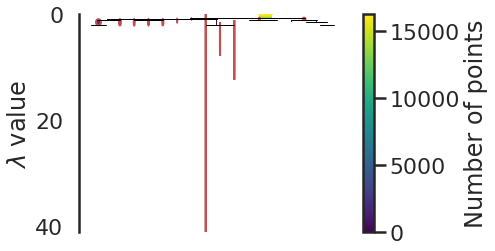

In [108]:
# Línea larga = cluster 3
clusterer.condensed_tree_.plot(select_clusters = True)

In [69]:
unique, counts = np.unique(clusterer.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 7427]
 [   0 1614]
 [   1  882]
 [   2  123]
 [   3  249]
 [   4  122]
 [   5  132]
 [   6  163]
 [   7  638]
 [   8  538]
 [   9  440]
 [  10 2815]
 [  11 1101]]


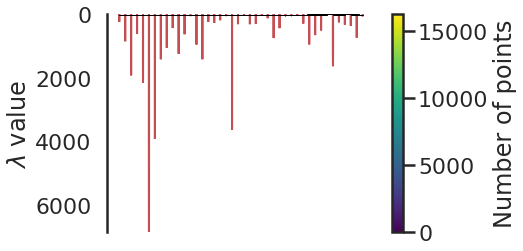

In [111]:
# Líneas largas = cluster 33, 36, 22
clusterer2.condensed_tree_.plot(select_clusters = True)

In [70]:
unique, counts = np.unique(clusterer2.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 6664]
 [   0  380]
 [   1  299]
 [   2  200]
 [   3  447]
 [   4  339]
 [   5  468]
 [   6  103]
 [   7  213]
 [   8  107]
 [   9  278]
 [  10  231]
 [  11  172]
 [  12  288]
 [  13  156]
 [  14  134]
 [  15  108]
 [  16  677]
 [  17  159]
 [  18  108]
 [  19  125]
 [  20  586]
 [  21  124]
 [  22  260]
 [  23  191]
 [  24  121]
 [  25  148]
 [  26  141]
 [  27  148]
 [  28  149]
 [  29  278]
 [  30  348]
 [  31  166]
 [  32  136]
 [  33  122]
 [  34  159]
 [  35  358]
 [  36  348]
 [  37  132]
 [  38  126]
 [  39  197]
 [  40  119]
 [  41  231]]


In [64]:
dataNoDims['Cluster_dissimKP']=clusterer.labels_

In [65]:
dataNoDims['Cluster_Gower']=clusterer2.labels_

In [66]:
dataNoDims.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01,10,37
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00,10,37
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00,-1,-1
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00,10,37
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00,10,-1


In [71]:
dataNoDims.sample(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
13486,19,IG56,HTS119,1/0,C,PC,CAT17,8558.3034,1.00,0.00,-1,24
10146,3,IG31,HTS55,1/1,A,YD,CAT12,-99.8127,-100.00,0.18,0,4
12003,10,IG14,HTS15,1/1,C,BX,CAT8,191.2653,1.00,0.00,8,22
13746,4,IG30,HTS46,1/0,B,YD,CAT12,-4478.3064,-100.00,0.00,-1,-1
12006,9,IG14,HTS15,1/1,C,BX,CAT8,219.6198,14.29,0.00,8,22


In [88]:
dataNoDims[dataNoDims['CAT']=='CAT14'].Cluster_dissimKP.unique()

array([ 9, -1,  7])

In [89]:
dataNoDims[dataNoDims['CAT']=='CAT14'].Cluster_Gower.unique()

array([20, 16, -1, 18, 19, 15, 17])